### **1. Objection: Evaluate whether purchasing a VIP subscription affects a user's chances of being matched, categorized as high, average, or low.** ###

While dating apps increasingly promote premium subscriptions as a way to improve users’ chances of finding love, the actual impact of these features remains unclear. Media analysis, like The Guardian’s, suggests that paid features may not significantly enhance match outcomes. This uncertainty highlights the need for data-driven evaluation. My research addresses this gap by using predictive modeling to assess whether purchasing a VIP subscription truly affects a user’s chances of being matched, categorized as high, average, or low.

Source: https://www.theguardian.com/lifeandstyle/2021/apr/24/dating-apps-premium-find-love-over-30

### **2. Data Description:** ###

#### **About the dataset:** ####

The dataset provides a comprehensive view of the dynamics of online matchmaking interaction and captures essential variables that influence the likelihood of successful matches across different genders. 

#### **Collection:** ####

The owner claims that the source of this dataset is confidential.

#### **Supporting Explanations:** ####


Gender: 0 (Male), 1 (Female)

PurchasedVIP: 0 (No), 1 (Yes)

Income: Annual income in USD

Children: Number of children

Age: Age of the user

Attractiveness: Subjective rating of attractiveness (1-10)

Matches: Number of matches obtained based on the criteria. 

#### **Resource:** ####
https://www.kaggle.com/datasets/rabieelkharoua/predict-online-dating-matches-dataset
#### **Owner: Rabie El Kharoua** ####

### **3. Data Processing** ###

##### Importing the Required Libraries and Dataset #####

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 

import warnings
warnings.filterwarnings('ignore')

dates = pd.read_csv('Online_Dating_Behavior_Dataset.csv')
dates

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0
...,...,...,...,...,...,...,...
995,0,0,36799,0,28,1,0
996,0,1,43882,2,46,9,70
997,1,0,49629,2,49,6,120
998,1,0,45706,1,22,8,140


##### Checking for missing data #####

In [22]:
dates.isna().sum()

Gender            0
PurchasedVIP      0
Income            0
Children          0
Age               0
Attractiveness    0
Matches           0
dtype: int64

##### Checking the data type #####

In [24]:
dates.dtypes

Gender            int64
PurchasedVIP      int64
Income            int64
Children          int64
Age               int64
Attractiveness    int64
Matches           int64
dtype: object

##### Checking for duplicates #####

In [26]:
dates[dates.duplicated()]

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches


##### As seen above, this dataset is well-organized and ready for processing. However, I decided to check whether the binary categories were balanced by using .value_counts() ####

In [28]:
dates ['Gender'].value_counts()

Gender
1    510
0    490
Name: count, dtype: int64

In [29]:
dates ['PurchasedVIP'].value_counts()

PurchasedVIP
0    526
1    474
Name: count, dtype: int64

##### As decided earlier, I wanted to categorize the number of matches. To do this, I used a boxplot to examine the data's distribution. ####

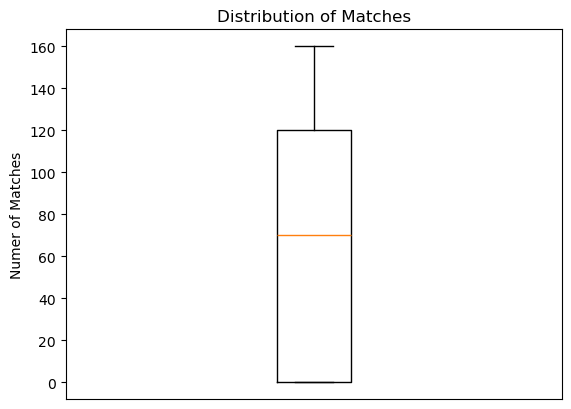

In [31]:
plt.boxplot(dates['Matches'])


plt.title('Distribution of Matches')
plt.ylabel ('Numer of Matches')
plt.xticks([])

plt.show()

##### Based on the boxplot and the approximate quartile spread, I defined thresholds for each category. Additionally, I renamed the column 'Matches' to 'Number of Matches' to clearly differentiate it from the new column containing the categorical labels. ####

In [33]:
dates.rename(columns = {'Matches': 'Number of Matches'}, inplace = True)

In [34]:
def categorize(score):
    if score >= 120:
        return "high"
    elif score >= 40:
        return "average"
    else:
        return "low"
dates["Match"] = dates["Number of Matches"].apply(categorize)

### **3. EDA** ### 

I began by examining the distribution by Gender and VIP Subscription, since I had previously checked their balance in the dataset. As shown below, both variables reveal interesting patterns. For VIP Subscription, users who had purchased it were not categorized into the low match group, though they didn’t show significantly higher chances of being in the high match group either. Regarding Gender, there’s a clear trend: male users were not placed in the high match category, whereas female users were more likely to be classified in it. Given how odd this finding was, I rechecked it with a two-way frequency table, which confirmed that there were 0 male users in the 'high' and 0 female users in the 'low' category. This could potentially be linked to psychological factors—for instance, female users may have been less inclined to report lower match counts. At the same time, both groups (with and without subscription, as well as male and female) show a relatively similar distribution within the average match category.

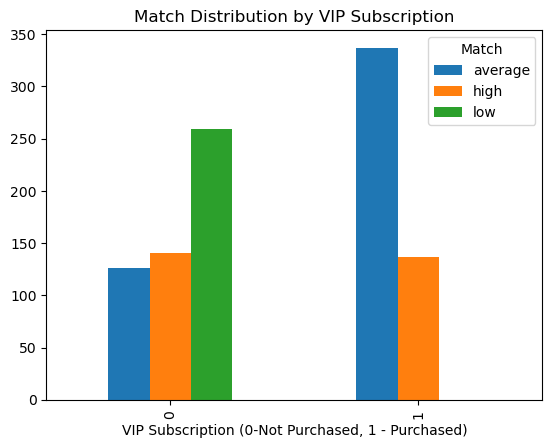

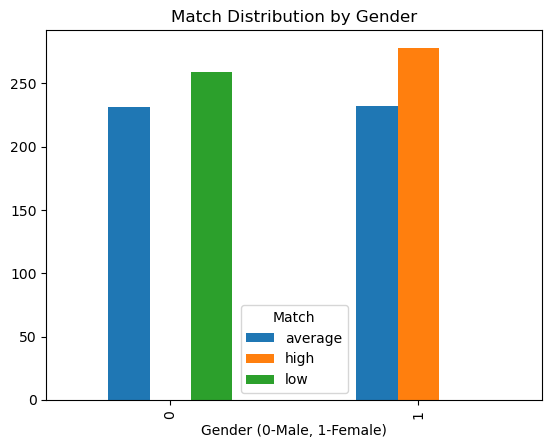

In [168]:
pd.crosstab(dates['PurchasedVIP'], dates['Match']).plot(kind='bar')
plt.title('Match Distribution by VIP Subscription')
plt.xlabel('VIP Subscription (0-Not Purchased, 1 - Purchased)')
plt.show()

pd.crosstab(dates['Gender'], dates['Match']).plot(kind='bar')
plt.title('Match Distribution by Gender')
plt.xlabel('Gender (0-Male, 1-Female)')
plt.show()


In [240]:
table = pd.crosstab(dates['Gender'], dates['Match'], margins=True)
table

Match,average,high,low,All
Gender,,,,
0,231,0,259,490
1,232,278,0,510
All,463,278,259,1000


I also decided to examine the patterns for Income; however, due to the underrepresentation of male users in the high match category and female users in the low match category, any insights drawn from this variable may not be fully reliable. 

<Axes: xlabel='Match', ylabel='Income'>

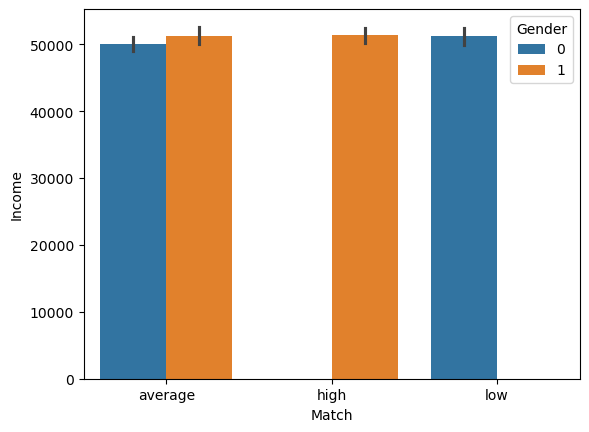

In [182]:
sns.barplot(x='Match', y='Income', data=dates, hue = 'Gender')

'Children' variable also did not reveal any meaningful patterns in relation to match categories.


<Axes: xlabel='Children', ylabel='Number of Matches'>

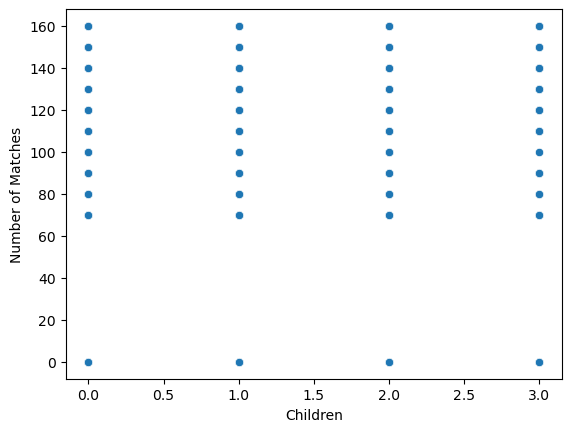

In [219]:
sns.scatterplot(x='Children', y='Number of Matches', data=dates)

The chart shows that while female users receive significantly more matches as attractiveness increases, male users see little change, highlighting a gender disparity in how subjective attractiveness impacts match success. It also underlines that there were more factors underlying the male users' match likelihood. 

<Axes: xlabel='Attractiveness', ylabel='Number of Matches'>

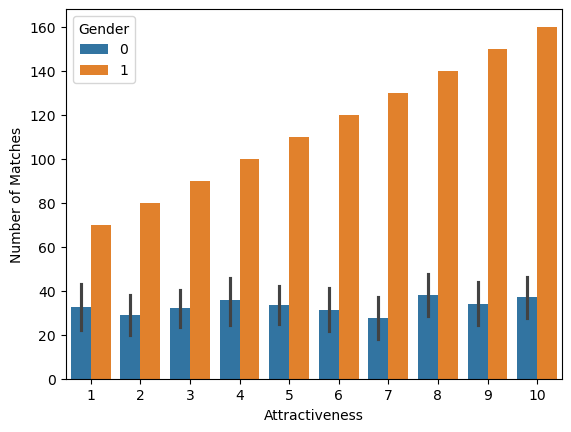

In [224]:
sns.barplot(x='Attractiveness', y='Number of Matches', hue = 'Gender', data=dates)

As mentioned before, gender appears to substantially influence match outcomes (in the context of this data set), while age shows only mild variation across categories.

<Axes: xlabel='Age', ylabel='Match'>

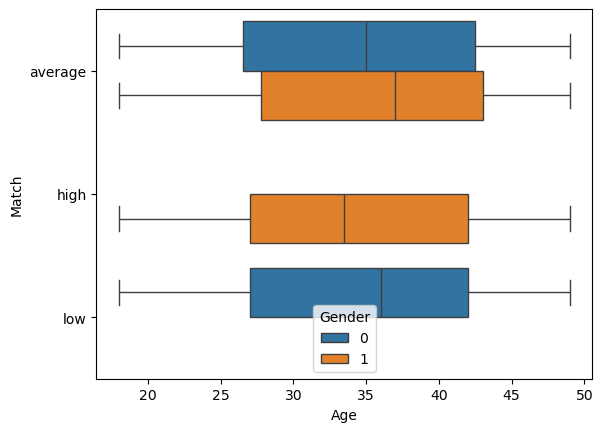

In [235]:
sns.boxplot(x='Age', y='Match', hue = 'Gender', data=dates)

Given the complexity of the findings and the overall limitations, I decided to include all available features in the model.

### **4. Data Modeling** ###

##### Selecting independent variables and the dependent variable, and scaling #####

In [38]:
x = dates[['Gender', 'PurchasedVIP', 'Income', 'Children', 'Age', 'Attractiveness']]  
y = dates['Match'] 
scaler = StandardScaler()
x = scaler.fit_transform(x)

##### Creating a dictionary in order to determine the accuracy scores of various values of k, and adding them #####

In [40]:
k_values = [i for i in range (1,31)]
accuracies = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y)
    score = np.mean(scores)
    accuracies[k] = score



##### Plotting the K values and their corresponding accuracy scores from the previous step to evaluate whether the current range needs adjustment #####

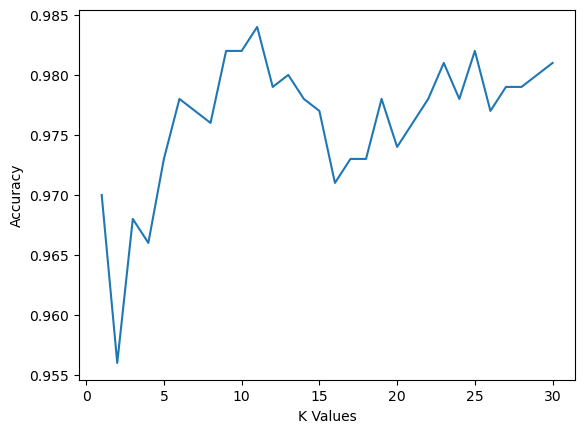

In [42]:
plt.plot(k_values, accuracies.values())
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.show()

##### It is clear that there is no need to expand the range, as the trend declines after 10-11. To confirm this, I used a dictionary of k-values and their corresponding accuracy scores to identify which k-value(s) yielded the highest accuracy. My prediction of approximately 11 proved to be accurate. #####

In [44]:
max_val = max(accuracies.values())
max_pairs = []
for k, score in accuracies.items():
    if score == max_val:
        max_pairs.append([k, score])
max_pairs

[[11, 0.984]]

##### Splitting the data into training and testing data, and transforming ###### 

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 4)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##### Model creation with the previously defined optimal value of k ######

In [48]:
model = KNeighborsClassifier(n_neighbors = 11)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

### **5. Model Evaluation** ###

##### Evaluating the accuracy score of this model #####

In [51]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


##### Generating a classification report for this model #####

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     average       1.00      1.00      1.00        93
        high       1.00      1.00      1.00        53
         low       1.00      1.00      1.00        54

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



##### Generating a confusion matrix for this model #####

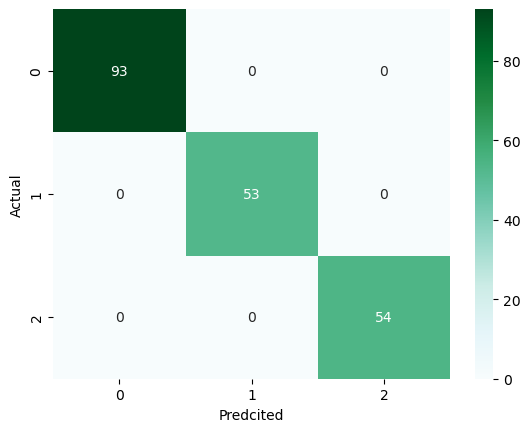

In [55]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot = True, cmap = 'BuGn')
plt.xlabel ('Predcited')
plt.ylabel('Actual')
plt.show()

##### As shown in the metrics (all exceeding 0.7), the model can be considered reliable. Additionally, the 'diagonal values' in the confusion matrix further support this claim. #####

### **6. Model Application** ###

##### I decided to use a combination of mean and median values to create an imaginary male user. #####

In [59]:
print("Average Income:", round(dates['Income'].mean()))
print("Median Children:", dates['Children'].median())
print("Average Age:", round(dates['Age'].mean()))
print("Median Attractiveness:", dates['Attractiveness'].median())

Average Income: 50988
Median Children: 1.0
Average Age: 35
Median Attractiveness: 6.0


##### Finally, I applied the model to evaluate the categorized quantity of matches using the same metrics for the same user, excluding the VIP subscription. The first prediction reflects the user without a VIP subscription, and the second—with it. #####

In [61]:
new = [[0, 0, 50988, 1, 35, 6]]
new = sc.transform(new)
new_pred = model.predict(new)
new_pred[0]

'average'

In [62]:
new = [[0, 1, 50988, 1, 35, 6]]
new = sc.transform(new)
new_pred = model.predict(new)
new_pred[0]

'average'

### **7. Conclusion** ###

##### As demonstrated above, purchasing a VIP subscription does not affect one's performance on dating apps by increasing the number of matches. #####

### **8. Caveats** ###

##### This dataset contains 1000 records, which is relatively small. Additionally, the data may not fully reflect reality, as it was captured intermittently over different periods of time. Furthermore, as noted by the author of the dataset, 'certain match categories are missing due to confidentiality constraints, and several other crucial variables are also absent for the same reason,' which ultimately affects the predicted number of matches. #####
##### Additionally, the author warns that 'only users with variables showing high correlation with the matching variable were included in the dataset.' Therefore, the high accuracy of models based on this dataset is primarily due to the data collection method. #####
##### On a separate note, the dataset contains 'ghost users' who are associated with 0 matches. These users create an account but later abandon the app, which distorts the findings. #####
##### Finally, the methods of defining thresholds for categorizing should be enhanced through the performance of a more complex analysis. #####
